## Import Modules

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN

## Loading the Dataset

In [2]:
# Read the file
adress = r'tel_churn.csv'
df = pd.read_csv(adress)

In [3]:
# Firts 5 rows
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [4]:
# Chack the number os rows and columns
df.shape

(7032, 52)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   int64  
 6   gender_Male                              7032 non-null   int64  
 7   Partner_No                               7032 non-null   int64  
 8   Partner_Yes                              7032 non-null   int64  
 9   Dependents_No                            7032 non-null   int64  
 10  Dependents_Yes                           7032 no

In [6]:
df.describe()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3521.562144,0.162400,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.219283,0.216297,0.336320,0.228100,0.309300,0.14562,0.118316,0.108362,0.118316,0.200085
std,2032.832448,0.368844,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.413790,0.411748,0.472483,0.419637,0.462238,0.35275,0.323005,0.310859,0.323005,0.400092
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1762.750000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3521.500000,0.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,5282.250000,0.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,7042.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


## Explatory Data Analysis

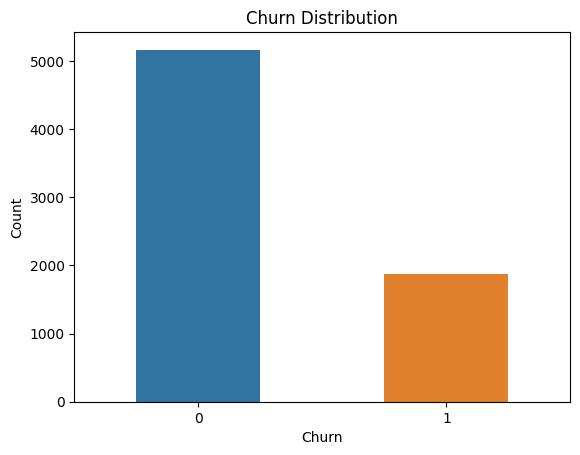

In [7]:
# Churn Distribution
sns.countplot(x='Churn', data=df, width = 0.5)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

plt.show()

In [8]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

=> Highly imbalanced

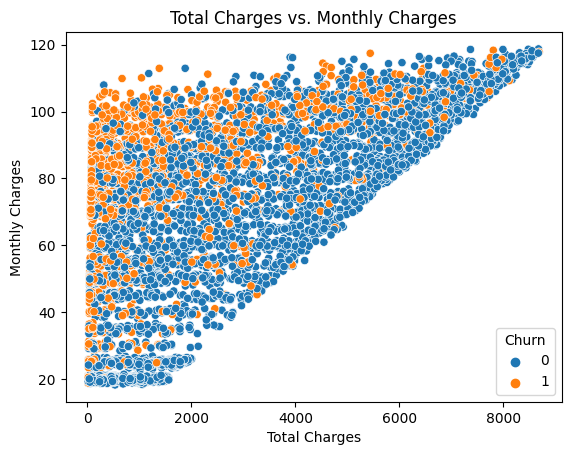

In [9]:
# Total Charges vs. Monthly Charges
sns.scatterplot(x = 'TotalCharges', y = 'MonthlyCharges', hue = 'Churn', data = df)
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.title('Total Charges vs. Monthly Charges')
plt.show()

Text(0.5, 1.0, 'Monthly Charges by Churn')

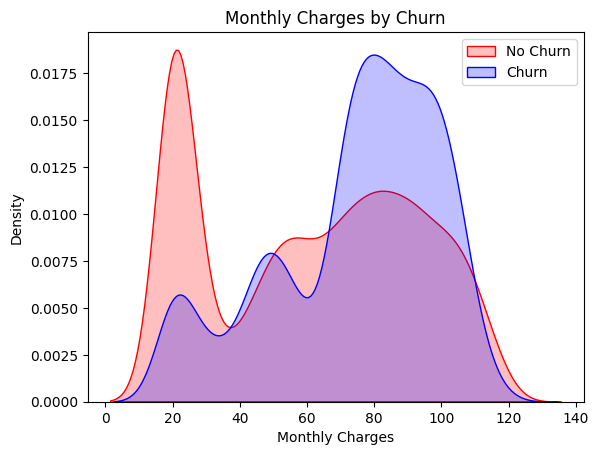

In [10]:
# Churn by Monthly Charges and total charges
Mth = sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 0)], color = 'Red', fill = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 1)], ax = Mth, color = 'Blue', fill = True)

Mth.legend(['No Churn', 'Churn'])
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

Churn goes higher as monthly charges increase 

Text(0.5, 1.0, 'Total Charges by Churn')

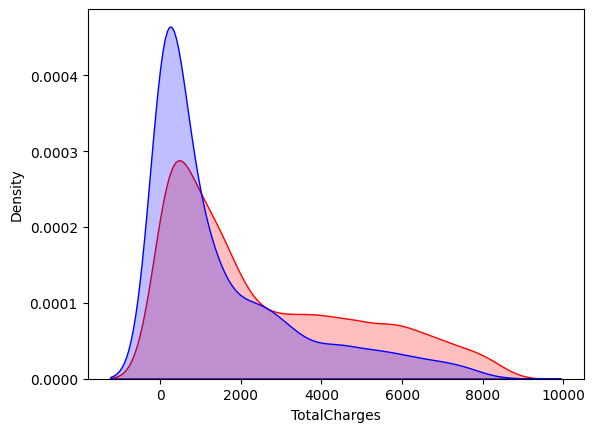

In [11]:
# Churn by Monthly Charges and total charges
Tot = sns.kdeplot(df.TotalCharges[(df['Churn'] == 0)], color = 'Red', fill = True)
Tot = sns.kdeplot(df.TotalCharges[(df['Churn'] == 1)], ax = Tot, color = 'Blue', fill = True)

Mth.legend(['No Churn', 'Churn'])
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total Charges by Churn')

Higher churn in lower Total charges

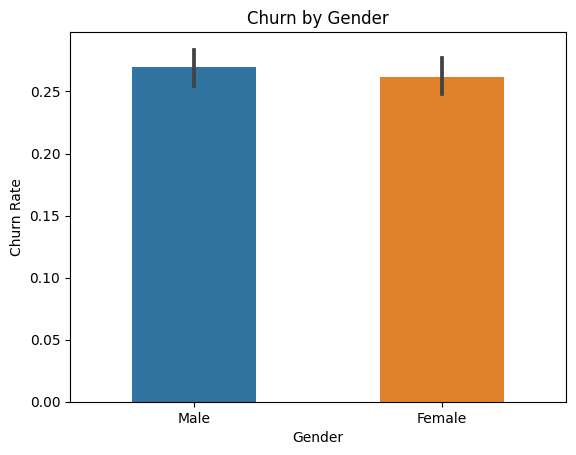

In [12]:
# Churn by Gender
# Create a new 'Gender' column by combining 'gender_Female' and 'gender_Male'
df2 = df.copy()
df2['Gender'] = df2['gender_Female'].astype(str) + df2['gender_Male'].astype(str)

# Map the combined values to 'Male' and 'Female'
df2['Gender'] = df2['Gender'].map({'01': 'Female', '10': 'Male'})
df2.drop(['gender_Female', 'gender_Male'], axis=1, inplace = True)

sns.barplot(x = 'Gender', y = 'Churn', data = df2, width = 0.5)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn by Gender')
plt.show()

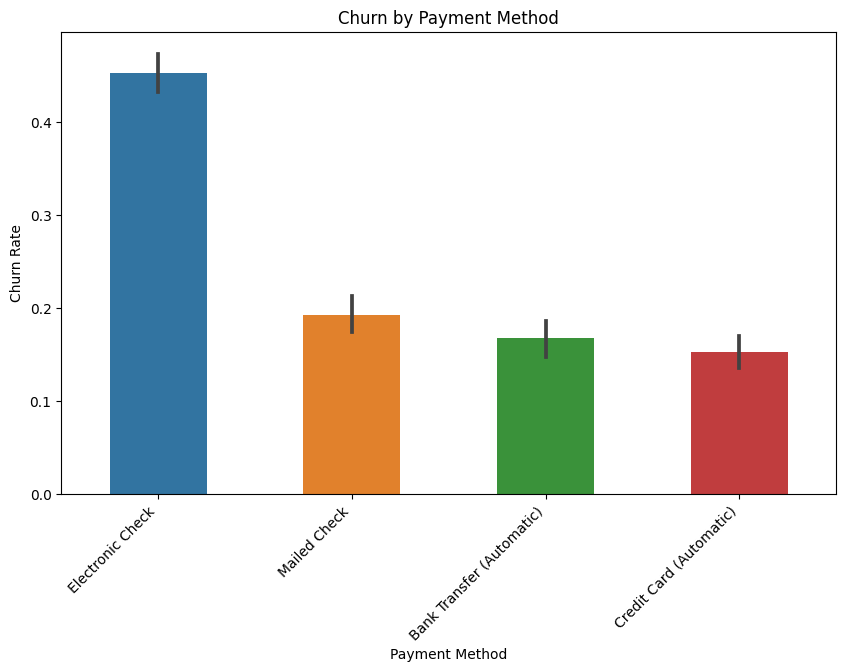

In [13]:
# Churn by Payment Method 
# Combine the payment method columns into a single 'Payment Method' column
df2 = df.copy()

df2['Payment Method'] = df2['PaymentMethod_Bank transfer (automatic)'].astype(str) + df2['PaymentMethod_Credit card (automatic)'].astype(str) + df2['PaymentMethod_Electronic check'].astype(str) + df2['PaymentMethod_Mailed check'].astype(str)

# Map the combined values to actual payment method names
payment_method_mapping = {
    '0000': 'No Payment Method',
    '0001': 'Mailed Check',
    '0010': 'Electronic Check',
    '0100': 'Credit Card (Automatic)',
    '1000': 'Bank Transfer (Automatic)',
}
df2['Payment Method'] = df2['Payment Method'].map(payment_method_mapping)

# Now you can drop the individual payment method columns if needed
columns_to_drop = ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
df2.drop(columns_to_drop, axis = 1, inplace = True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Churn', data=df2, width = 0.5)
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<Axes: >

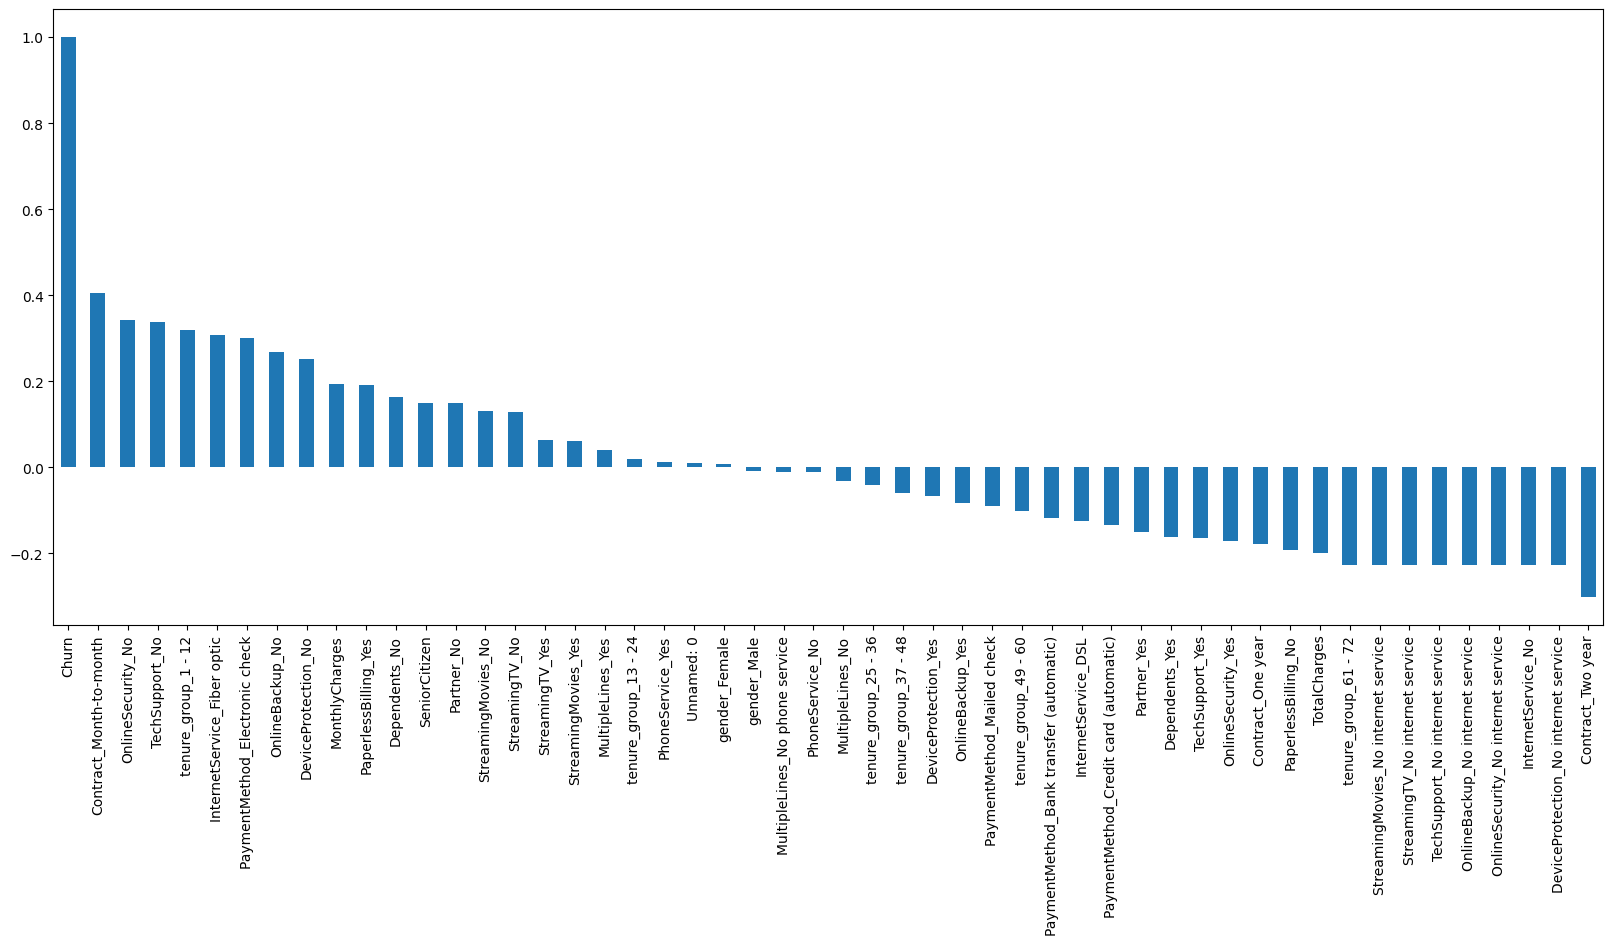

In [14]:
# Correlation
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

High Churn seen in case of month to month contracts, No online security. No Tech support. First year of subscription and Fibre Optics Interns 
L0w Churn is seens in case of Long term contracts, Subscriptions without Internet service and The customers engaged for 5+ year
Factors like Gender. Availability of Phone Service and # of multiple lines have alomost NO impact on Churn This is also evident from the Heatmap below

## Preprocessing

In [15]:
# Seperating features and target
X = df.drop('Churn', axis = 1)

y = df['Churn']

### Handeling Imbalanced data with over sampling

In [17]:
# Balancing the data via SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [18]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model Selection

In [19]:
# Choosing the best model using cross val 
# Define a dictionary of models
models =  {'descion_tree' : DecisionTreeClassifier(), 'random_forest' : RandomForestClassifier(), 'XGBoost' : XGBClassifier()}
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('imputer', SimpleImputer()),  
        ('scaler', StandardScaler()), 
        ('model', model)  
    ])
    
    kf = KFold(n_splits = 6, random_state = 42, shuffle = True)
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv = kf)
    
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    
# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

print(results_df)

           Model  Accuracy  Precision    Recall  F1 Score
0   descion_tree  0.727644   0.488133  0.509030  0.498363
1  random_forest  0.790756   0.639229  0.488294  0.553659
2        XGBoost  0.785067   0.611719  0.523746  0.564324


## Model Training

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a pipeline with all the necessary preprocessing and the RandomForestClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ("scaler", StandardScaler()),
    ('rf', RandomForestClassifier()) 
])

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [3, 4, 5],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_classifier = RandomForestClassifier()

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and best score for Random Forest
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)


Best Hyperparameters for Random Forest: {'rf__max_depth': 5, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best Score for Random Forest: 0.8026666666666668


In [25]:
best_model = grid_search_rf.best_estimator_

In [26]:
# Fit the model
best_model.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=200))])

## Evaluate the Model

In [27]:
pred_training_data = best_model.predict(X_train)
accuracy_training_data = accuracy_score(pred_training_data, y_train)
accuracy_training_data

0.8104888888888889

In [28]:
pred_testing_data = best_model.predict(X_test)
accuracy_testing_data = accuracy_score(pred_testing_data, y_test)
accuracy_testing_data

0.7867803837953091

In [29]:
print(classification_report(y_test, pred_testing_data))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.66      0.41      0.50       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.68      1407
weighted avg       0.77      0.79      0.77      1407



## Save the model

In [30]:
import joblib

In [31]:
# Save the model
joblib.dump(best_model, 'customer_churn')

['customer_churn']

In [32]:
# Call the model
model = joblib.load('customer_churn')